<a href="https://colab.research.google.com/github/vennby/BioLib/blob/main/DM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Step 1: Partitioning the Main Dataset**
The main dataset, **"COVID-19 Vaccinations in the United States, County"**, has many features. We will first separate and arrange it into the format that we require to train the separate models.

The first partition we've performed separates the dataset on the basis of the years (2021, 2022, 2023), and includes only the following attributes:


*   Recip_County
*   Recip_State
*   Administered_Dose1_Recip
*   Series_Complete_Yes
*   SVI_CTGY



In [1]:
import pandas as pd
from google.colab import files

# File path (already loaded)
file = '/content/drive/MyDrive/1. Semesters/Semester 6/DM/Project/DMDataset_TeamID_06.csv'

# Step 1: Read the CSV file
df = pd.read_csv(file)

# Step 2: Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Filter necessary columns
columns_needed = ['Date', 'Recip_County', 'Recip_State', 'Administered_Dose1_Recip',
                  'Series_Complete_Yes', 'SVI_CTGY']
df = df[columns_needed]

# Step 4: Map the SVI categories to numeric rankings
svi_mapping = {'A': 3, 'B': 2, 'C': 1, 'D': 0}
df['SVI_Rank'] = df['SVI_CTGY'].map(svi_mapping)

# Step 5: Filter by year and save to CSV files
for year in [2021, 2022, 2023]:
    df_year = df[df['Date'].dt.year == year]
    output_filename = f"vaccination_data_{year}.csv"
    df_year.to_csv(output_filename, index=False)
    files.download(output_filename)

# Step 6: Analyze SVI_CTGY bins
print("\nSVI Category Analysis:")
svi_summary = {}

for category in df['SVI_CTGY'].dropna().unique():
    cat_data = df[df['SVI_CTGY'] == category]['Series_Complete_Yes']
    if not cat_data.empty:
        svi_summary[category] = {
            'min': cat_data.min(),
            'max': cat_data.max(),
            'mean': cat_data.mean(),
            'count': len(cat_data)
        }

# Step 7: Save SVI bin summary
svi_df = pd.DataFrame.from_dict(svi_summary, orient='index')
svi_df.index.name = 'SVI_CTGY'
print(svi_df)

svi_summary_file = "SVI_CTGY_summary.csv"
svi_df.to_csv(svi_summary_file)
files.download(svi_summary_file)

<ipython-input-1-5363e1c4440d>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)
<ipython-input-1-5363e1c4440d>:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['SVI_Rank'] = df['SVI_CTGY'].map(svi_mapping)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


SVI Category Analysis:
          min        max          mean   count
SVI_CTGY                                      
A         0.0  1366218.0  33545.943286  481967
B         0.0  2358821.0  48763.812910  480813
C         0.0  3862965.0  54490.212218  480792
D         0.0  7536300.0  38582.488313  481411


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [2]:
import pandas as pd
from google.colab import files

# File path (already loaded)
file = '/content/drive/MyDrive/1. Semesters/Semester 6/DM/Project/DMDataset_TeamID_06.csv'

# Step 1: Read the CSV file
df = pd.read_csv(file)

# Step 2: Convert 'Date' column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Filter necessary columns (now includes 'Metro_status')
columns_needed = ['Date', 'Recip_County', 'Recip_State', 'Administered_Dose1_Recip',
                  'Series_Complete_Yes', 'SVI_CTGY', 'Metro_status']
df = df[columns_needed]

# Step 4: Map the SVI categories to numeric rankings
svi_mapping = {'A': 3, 'B': 2, 'C': 1, 'D': 0}
df['SVI_Rank'] = df['SVI_CTGY'].map(svi_mapping)

# Step 5: Filter by year and save to CSV files
for year in [2021, 2022, 2023]:
    df_year = df[df['Date'].dt.year == year]
    output_filename = f"vaccination_data_{year}.csv"
    df_year.to_csv(output_filename, index=False)
    files.download(output_filename)

# Step 6: Analyze SVI_CTGY bins (with Metro_status as sub-category)
print("\nSVI Category Analysis by Metro_status:")
svi_summary = {}

for category in df['SVI_CTGY'].dropna().unique():
    for metro in df['Metro_status'].dropna().unique():
        subset = df[(df['SVI_CTGY'] == category) & (df['Metro_status'] == metro)]
        cat_data = subset['Series_Complete_Yes']
        if not cat_data.empty:
            svi_summary[(category, metro)] = {
                'min': cat_data.min(),
                'max': cat_data.max(),
                'mean': cat_data.mean(),
                'count': len(cat_data)
            }

# Step 7: Save SVI bin summary with Metro_status
svi_df = pd.DataFrame.from_dict(svi_summary, orient='index')
svi_df.index = pd.MultiIndex.from_tuples(svi_df.index, names=['SVI_CTGY', 'Metro_status'])
print(svi_df)

svi_summary_file = "SVI_CTGY_Metro_summary.csv"
svi_df.to_csv(svi_summary_file)
files.download(svi_summary_file)

<ipython-input-2-cd925e1dc326>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


SVI Category Analysis by Metro_status:
                       min        max           mean   count
SVI_CTGY Metro_status                                       
A        Non-metro     0.0   141817.0    7016.614697  278517
         Metro         0.0  1366218.0   69787.201230  203450
B        Non-metro     0.0    92419.0    8473.338810  274820
         Metro         0.0  2358821.0  103112.181315  205395
C        Non-metro     0.0    78507.0    8608.800437  284196
         Metro         0.0  3862965.0  120560.845606  196596
D        Non-metro     0.0    95454.0    8107.255157  348322
         Metro         0.0  7536300.0  118291.770537  133089


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **Step 2: Training the Base Model**

Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     89186
         1.0       1.00      1.00      1.00     88396
         2.0       1.00      1.00      1.00     84627
         3.0       1.00      1.00      1.00     84501

    accuracy                           1.00    346710
   macro avg       1.00      1.00      1.00    346710
weighted avg       1.00      1.00      1.00    346710



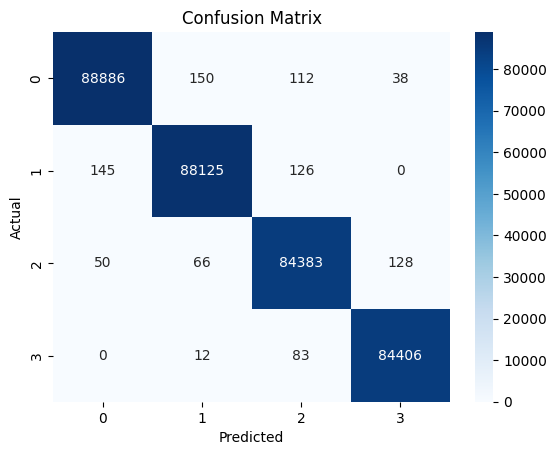

In [30]:
# Step 1: Install necessary packages
!pip install pandas scikit-learn openpyxl matplotlib seaborn --quiet

# Step 2: Imports
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Step 3: File paths
racial_file = 'CountyRacialData.xlsx'
years = ['2021', '2022', '2023']
vacc_files = {year: f'vaccination_data_{year}.csv' for year in years}

# Step 4: Load racial data (with total and major races)
racial_data = []
expected_cols = ['State', 'County', 'Population', 'White', 'Black', 'Hispanic', 'Asian',
                 'Multiple_Races', 'AIAN', 'NHPI']

for year in years:
    df = pd.read_excel(racial_file, sheet_name=year)
    if df.shape[1] == 9:
        df.columns = expected_cols[:-1]  # Missing NHPI
        df['NHPI'] = 0
    elif df.shape[1] == 10:
        df.columns = expected_cols
    else:
        raise ValueError(f"Unexpected number of columns in sheet {year}")
    df['Year'] = int(year)
    racial_data.append(df)

racial_all = pd.concat(racial_data, ignore_index=True)

# Step 5: Load SVI data
svi_data = []
for year in years:
    df = pd.read_csv(vacc_files[year])
    df = df[['Recip_State', 'Recip_County', 'SVI_CTGY']]
    df.columns = ['State', 'County', 'SVI_CTGY']
    df['Year'] = int(year)
    svi_data.append(df)

svi_all = pd.concat(svi_data, ignore_index=True)

# Step 6: Normalize state and county names
def normalize_names(df):
    df['State'] = df['State'].astype(str).str.strip().str.upper()
    df['County'] = df['County'].astype(str).str.strip().str.upper().str.replace(' COUNTY', '', regex=False)
    return df

racial_all = normalize_names(racial_all)
svi_all = normalize_names(svi_all)

# Step 7: Merge datasets
merged_df = pd.merge(racial_all, svi_all, how='inner', on=['State', 'County', 'Year'])

# Step 8: Fill missing values
merged_df[['Population', 'White', 'Black', 'Hispanic', 'Asian']] = merged_df[[
    'Population', 'White', 'Black', 'Hispanic', 'Asian']].fillna(0)

# Step 9: Add proportion features
for race in ['White', 'Black', 'Hispanic', 'Asian']:
    merged_df[f'{race}_pct'] = merged_df[race] / merged_df['Population'].replace(0, 1)

# Step 10: Correct SVI label mapping
merged_df['SVI_Rank'] = merged_df['SVI_CTGY'].map({'A': 3, 'B': 2, 'C': 1, 'D': 0})
merged_df = merged_df.dropna(subset=['SVI_Rank'])

# Step 11: Feature matrix and labels
features = ['Population', 'White_pct', 'Black_pct', 'Hispanic_pct', 'Asian_pct']
X = merged_df[features]
y = merged_df['SVI_Rank']

# Step 12: Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 13: Split the data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 14: Train the model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train, y_train)

# Step 15: Evaluate the model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 17: Inference function (partial input allowed)
def predict_svi(input_dict):
    input_dict = input_dict.copy()
    pop = input_dict.get('Population', 0) or 1  # Avoid division by zero
    for race in ['White', 'Black', 'Hispanic', 'Asian']:
        input_dict[f'{race}_pct'] = input_dict.get(race, 0) / pop
    input_vector = np.array([[input_dict.get(col, 0) for col in features]])
    input_scaled = scaler.transform(input_vector)
    prediction = model.predict(input_scaled)[0]
    return {3: 'A', 2: 'B', 1: 'C', 0: 'D'}[prediction]

# Step 18: Example predictions
example_high = {'Black': 30000, 'Hispanic': 25000, 'Population': 60000}
example_low = {'White': 80000, 'Population': 85000}

In [31]:
example = {'White': 30680, 'Black': 6633, 'Hispanic': 2487, 'Asian': 829, 'Population': 41460}
print("Predicted SVI Category (high vulnerability):", predict_svi(example))

Predicted SVI Category (high vulnerability): A


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<ipython-input-37-92c2f936db7c>:8: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file)


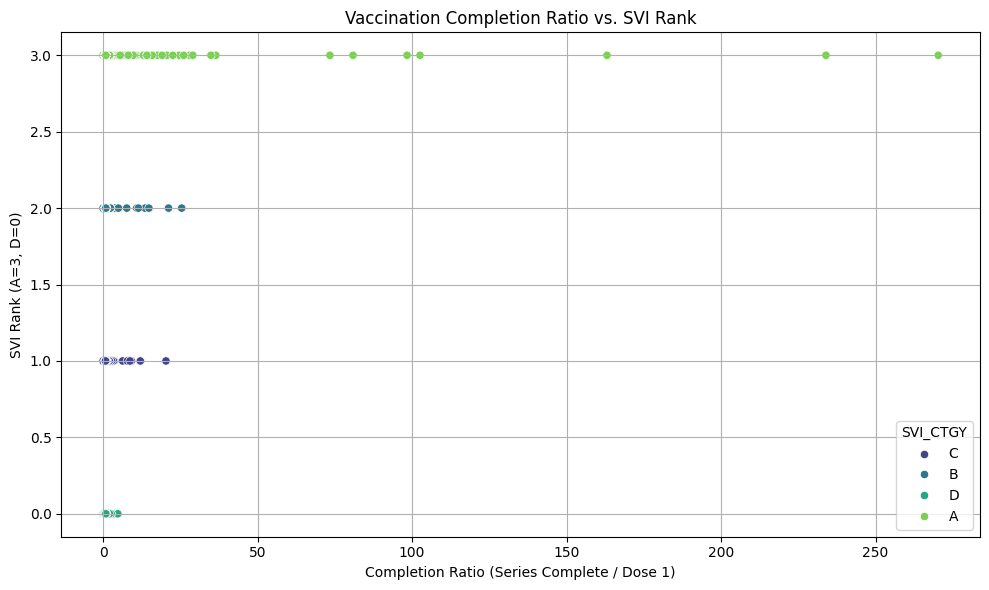

📊 Correlation between completion ratio and SVI Rank: 0.0502
🧮 Regression Coefficient: 0.0127
📈 Intercept: 1.4701
🔢 R² Score: 0.0025


In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

file = '/content/drive/MyDrive/1. Semesters/Semester 6/DM/Project/DMDataset_TeamID_06.csv'
df = pd.read_csv(file)

# Step 2: Convert date
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Step 3: Filter relevant columns
columns_needed = ['Date', 'Recip_County', 'Recip_State', 'Administered_Dose1_Recip',
                  'Series_Complete_Yes', 'SVI_CTGY']
df = df[columns_needed]

# Step 4: Map SVI category to numerical rank
svi_mapping = {'A': 3, 'B': 2, 'C': 1, 'D': 0}
df['SVI_Rank'] = df['SVI_CTGY'].map(svi_mapping)

# Step 5: Extract year and group by County-State-Year
df['Year'] = df['Date'].dt.year
agg_df = df.groupby(['Recip_State', 'Recip_County', 'Year', 'SVI_CTGY', 'SVI_Rank'], as_index=False).agg({
    'Series_Complete_Yes': 'sum',
    'Administered_Dose1_Recip': 'sum'
})

# Step 6: Calculate vaccination completion ratio
agg_df['Complete_Ratio'] = agg_df['Series_Complete_Yes'] / agg_df['Administered_Dose1_Recip'].replace(0, np.nan)

# Step 7: Drop incomplete or invalid rows
agg_df = agg_df.dropna(subset=['Complete_Ratio', 'SVI_Rank'])

# Step 8: Plot ratio vs. SVI
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agg_df, x='Complete_Ratio', y='SVI_Rank', hue='SVI_CTGY', palette='viridis')
plt.title('Vaccination Completion Ratio vs. SVI Rank')
plt.xlabel('Completion Ratio (Series Complete / Dose 1)')
plt.ylabel('SVI Rank (A=3, D=0)')
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 9: Correlation and linear regression
correlation = agg_df['Complete_Ratio'].corr(agg_df['SVI_Rank'])
print(f"📊 Correlation between completion ratio and SVI Rank: {correlation:.4f}")

X = agg_df[['Complete_Ratio']]
y = agg_df['SVI_Rank']
reg = LinearRegression().fit(X, y)
print(f"🧮 Regression Coefficient: {reg.coef_[0]:.4f}")
print(f"📈 Intercept: {reg.intercept_:.4f}")
print(f"🔢 R² Score: {reg.score(X, y):.4f}")

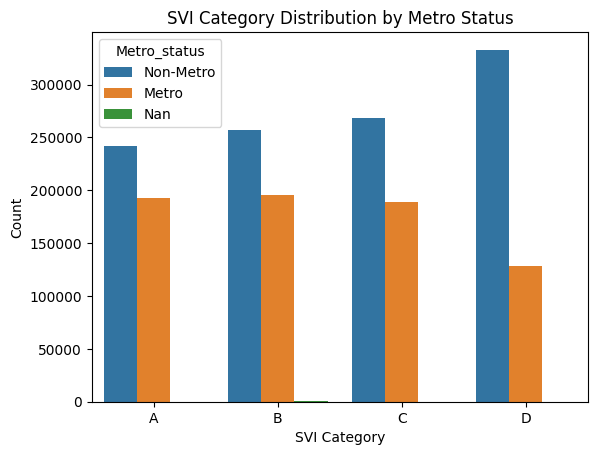

Classification Report:
               precision    recall  f1-score   support

         0.0       0.58      0.72      0.65     92357
         1.0       0.64      0.57      0.60     91713
         2.0       0.65      0.60      0.62     90842
         3.0       0.68      0.64      0.66     86518

    accuracy                           0.63    361430
   macro avg       0.64      0.63      0.63    361430
weighted avg       0.64      0.63      0.63    361430



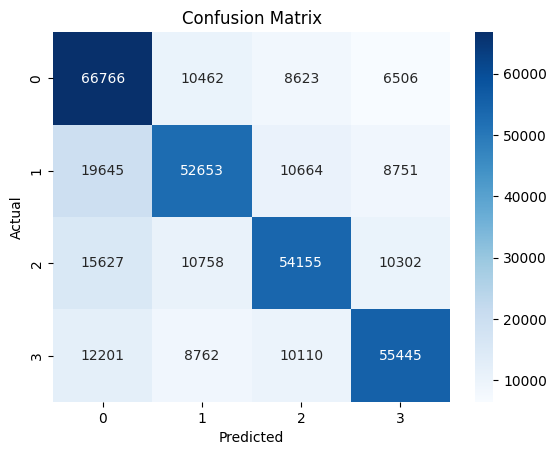

Example (Urban with first dose and completed series): B
Example (Rural with first dose and completed series): C


In [2]:
# Step 1: Imports and setup
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load vaccination data
years = ['2021', '2022', '2023']
vacc_files = {year: f'vaccination_data_{year}.csv' for year in years}

svi_data = []
for year in years:
    df = pd.read_csv(vacc_files[year])
    df = df[['Recip_State', 'Recip_County', 'SVI_CTGY', 'Metro_status', 'Administered_Dose1_Recip', 'Series_Complete_Yes']]
    df.columns = ['State', 'County', 'SVI_CTGY', 'Metro_status', 'First_Dose_Administered', 'Series_Complete']
    df['Year'] = int(year)
    svi_data.append(df)

df_all = pd.concat(svi_data, ignore_index=True)

# Step 3: Clean and preprocess
df_all['State'] = df_all['State'].astype(str).str.strip().str.upper()
df_all['County'] = df_all['County'].astype(str).str.strip().str.upper().str.replace(' COUNTY', '', regex=False)
df_all['Metro_status'] = df_all['Metro_status'].astype(str).str.strip().str.title()

df_all['SVI_Rank'] = df_all['SVI_CTGY'].map({'A': 3, 'B': 2, 'C': 1, 'D': 0})
df_all = df_all.dropna(subset=['SVI_Rank', 'Metro_status', 'First_Dose_Administered', 'Series_Complete'])

# Step 4: Visualize distribution
sns.countplot(data=df_all, x='SVI_CTGY', hue='Metro_status', order=['A', 'B', 'C', 'D'])
plt.title("SVI Category Distribution by Metro Status")
plt.xlabel("SVI Category")
plt.ylabel("Count")
plt.show()

# Step 5: Define features and target
X = df_all[['Metro_status', 'First_Dose_Administered', 'Series_Complete']]
y = df_all['SVI_Rank']

# Step 6: Pipeline with OneHotEncoder (no category drop) and scaling
pipeline = Pipeline([
    ('preprocessor', ColumnTransformer([
        ('cat', OneHotEncoder(drop=None, handle_unknown='ignore'), ['Metro_status']),
        ('num', StandardScaler(), ['First_Dose_Administered', 'Series_Complete'])
    ])),
    ('classifier', RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42))
])

# Step 7: Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 8: Train the model
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Step 9: Evaluation
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 11: Inference function
def predict_svi_metro_pop(input_dict):
    data = {
        'Metro_status': str(input_dict.get('Metro_status', 'Non-Metro')).strip().title(),
        'First_Dose_Administered': input_dict.get('First_Dose_Administered', 0),
        'Series_Complete': input_dict.get('Series_Complete', 0)
    }
    df_input = pd.DataFrame([data])
    prediction = pipeline.predict(df_input)[0]
    return {3: 'A', 2: 'B', 1: 'C', 0: 'D'}[prediction]

# Step 12: Example predictions
print("Example (Urban with first dose and completed series):", predict_svi_metro_pop({'Metro_status': 'Metro', 'First_Dose_Administered': 150000, 'Series_Complete': 120000}))
print("Example (Rural with first dose and completed series):", predict_svi_metro_pop({'Metro_status': 'Non-Metro', 'First_Dose_Administered': 5000, 'Series_Complete': 4000}))

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
Classification Report (India, Pseudo Labels):

              precision    recall  f1-score   support

           0       1.00      0.75      0.86         4
           3       0.75      1.00      0.86         3

    accuracy                           0.86         7
   macro avg       0.88      0.88      0.86         7
weighted avg       0.89      0.86      0.86         7



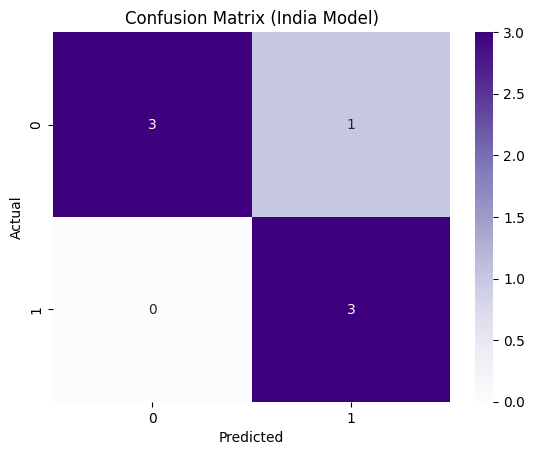

In [47]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# --- Step 1: Load and prepare Indian caste data ---
india_df = pd.read_csv('india_caste_data.csv')  # Replace with your actual CSV file path

# Normalize column names
india_df.columns = india_df.columns.str.strip().str.upper()
india_df = india_df.rename(columns={
    'TOT_P': 'Population',
    'P_SC': 'SC',
    'P_ST': 'ST',
    'P_OC': 'OC',
    'NAME': 'State'
})

# Handle missing values
india_df[['Population', 'SC', 'ST', 'OC']] = india_df[['Population', 'SC', 'ST', 'OC']].fillna(0)

# Calculate proportions
india_df['SC_pct'] = india_df['SC'] / india_df['Population'].replace(0, 1)
india_df['ST_pct'] = india_df['ST'] / india_df['Population'].replace(0, 1)
india_df['OC_pct'] = india_df['OC'] / india_df['Population'].replace(0, 1)

# --- Step 2: Map caste proportions to race-based features used in US model ---
mapped_df = pd.DataFrame()
mapped_df['Population'] = india_df['Population']
mapped_df['White_pct'] = india_df['OC_pct']       # OC → White
mapped_df['Black_pct'] = india_df['SC_pct']       # SC → Black
mapped_df['Hispanic_pct'] = india_df['ST_pct']    # ST → Hispanic
mapped_df['Asian_pct'] = 0                        # No direct analog

# --- Step 3: Generate pseudo-labels using US-trained model ---
X_india_us_format = mapped_df[['Population', 'White_pct', 'Black_pct', 'Hispanic_pct', 'Asian_pct']]
X_india_scaled = scaler.transform(X_india_us_format)
pseudo_labels = np.argmax(model.predict(X_india_scaled), axis=1)

india_df['Pseudo_SVI_Rank'] = pseudo_labels
india_df['Pseudo_SVI_CTGY'] = india_df['Pseudo_SVI_Rank'].map({3: 'A', 2: 'B', 1: 'C', 0: 'D'})

# --- Step 4: Train a new model using Indian features and pseudo-labels ---
features_india = ['Population', 'SC_pct', 'ST_pct', 'OC_pct']
X = india_df[features_india]
y = india_df['Pseudo_SVI_Rank']

# Scale with a new scaler for Indian data
scaler_india = StandardScaler()
X_scaled = scaler_india.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

india_model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
india_model.fit(X_train, y_train)

# --- Step 5: Evaluation ---
y_pred = india_model.predict(X_test)

print("Classification Report (India, Pseudo Labels):\n")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Purples')
plt.title("Confusion Matrix (India Model)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# --- Step 6: Prediction function for Indian inputs ---
def predict_svi_india(input_dict):
    input_dict = input_dict.copy()
    pop = input_dict.get('Population', 0) or 1
    input_dict['SC_pct'] = input_dict.get('SC', 0) / pop
    input_dict['ST_pct'] = input_dict.get('ST', 0) / pop
    input_dict['OC_pct'] = input_dict.get('OC', 0) / pop

    input_vector = np.array([[input_dict.get(col, 0) for col in features_india]])
    input_scaled = scaler_india.transform(input_vector)
    prediction = india_model.predict(input_scaled)[0]
    return {3: 'A', 2: 'B', 1: 'C', 0: 'D'}[prediction]

In [49]:
# Example
example_input = {'SC': 800, 'ST': 150, 'OC': 50, 'Population': 1000}
print("Predicted SVI Category for Indian State:", predict_svi_india(example_input))

Predicted SVI Category for Indian State: A


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
example_input = {'SC': 50, 'ST': 150, 'OC': 800, 'Population': 1000}
print("Predicted SVI Category for Indian State:", predict_svi_india(example_input))

Predicted SVI Category for Indian State: D


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [51]:
example_input = {'SC': 150, 'ST': 800, 'OC': 50, 'Population': 1000}
print("Predicted SVI Category for Indian State:", predict_svi_india(example_input))

Predicted SVI Category for Indian State: B


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


<ipython-input-10-28030175d35b>:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  metro_all['Vaccination_Coverage'] = metro_all['Series_Complete_Yes'] / metro_all['Administered_Dose1_Recip'].replace(0, 1)


Class distribution in the dataset:
SVI_Rank
3.0    466653
0.0    466116
2.0    465537
1.0    465516
Name: count, dtype: int64
Classification Report:
               precision    recall  f1-score   support

         0.0       0.60      0.73      0.66     93312
         1.0       0.67      0.61      0.64     93054
         2.0       0.67      0.63      0.65     92831
         3.0       0.71      0.67      0.69     93568

    accuracy                           0.66    372765
   macro avg       0.66      0.66      0.66    372765
weighted avg       0.66      0.66      0.66    372765



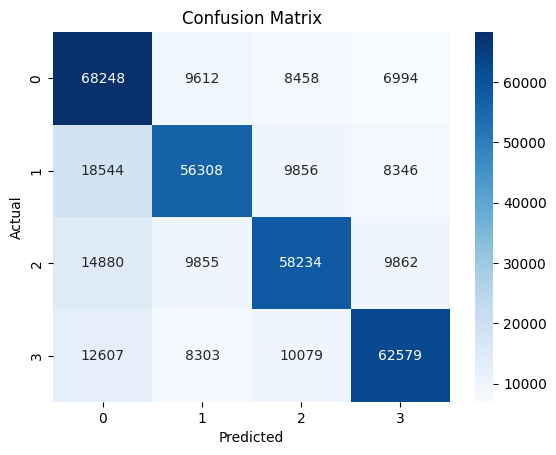

In [10]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE  # For oversampling minority class
from sklearn.impute import SimpleImputer  # For handling missing values

# Step 3: File Paths for USA Metro Data (2021-2023)
metro_files = {
    '2021': 'vaccination_data_2021.csv',
    '2022': 'vaccination_data_2022.csv',
    '2023': 'vaccination_data_2023.csv'
}

years = ['2021', '2022', '2023']

# Step 4: Load USA Metro Status Data (with metro status and vaccination data)
metro_data = []
expected_cols = ['Date', 'Recip_County', 'Recip_State', 'Administered_Dose1_Recip',
                 'Series_Complete_Yes', 'SVI_CTGY', 'Metro_status', 'SVI_Rank']

for year in years:
    file_path = metro_files[year]
    df = pd.read_csv(file_path)
    if df.shape[1] == 8:
        df.columns = expected_cols
    else:
        raise ValueError(f"Unexpected number of columns in file {file_path}")
    df['Year'] = int(year)
    metro_data.append(df)

metro_all = pd.concat(metro_data, ignore_index=True)

# Step 5: Normalize State and County Names
def normalize_names(df):
    df['Recip_State'] = df['Recip_State'].astype(str).str.strip().str.upper()
    df['Recip_County'] = df['Recip_County'].astype(str).str.strip().str.upper().str.replace(' COUNTY', '', regex=False)
    return df

metro_all = normalize_names(metro_all)

# Step 6: Correct SVI Label Mapping
metro_all['SVI_Rank'] = metro_all['SVI_CTGY'].map({'A': 3, 'B': 2, 'C': 1, 'D': 0})
metro_all = metro_all.dropna(subset=['SVI_Rank'])

# Step 7: Feature Engineering
metro_all['Vaccination_Coverage'] = metro_all['Series_Complete_Yes'] / metro_all['Administered_Dose1_Recip'].replace(0, 1)

# Step 8: Feature Matrix and Labels
features = ['Administered_Dose1_Recip', 'Series_Complete_Yes', 'Vaccination_Coverage']
X = metro_all[features]
y = metro_all['SVI_Rank']

# Step 9: Handle Missing Values (Impute NaNs)
imputer = SimpleImputer(strategy='mean')  # Using the mean to impute missing values
X_imputed = imputer.fit_transform(X)

# Step 10: Scale the Features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)

# Step 11: Check Class Distribution
print("Class distribution in the dataset:")
print(y.value_counts())

# Step 12: Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Step 13: Handle Class Imbalance using SMOTE
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)

# Step 14: Train the Model
model = RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42)
model.fit(X_train_balanced, y_train_balanced)

# Step 15: Evaluate the Model
y_pred = model.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Plot confusion matrix
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Step 16: Inference Function
def predict_svi_metro(input_dict):
    input_dict = input_dict.copy()
    input_vector = np.array([[input_dict.get(col, 0) for col in features]])
    input_scaled = scaler.transform(input_vector)
    prediction = model.predict(input_scaled)[0]
    return {3: 'A', 2: 'B', 1: 'C', 0: 'D'}[prediction]


In [11]:
example_1 = {
    'Administered_Dose1_Recip': 50000,   # Number of people who received the first dose
    'Series_Complete_Yes': 48000,         # Number of people who completed the vaccination series
    'Vaccination_Coverage': 0.96         # Coverage rate: 48,000 completed / 50,000 administered
}

# Call prediction function
result_1 = predict_svi_metro(example_1)
print(f"Predicted SVI Rank for Example 1: {result_1}")

Predicted SVI Rank for Example 1: C


In [13]:
example_2 = {
    'Administered_Dose1_Recip': 30000,   # Number of people who received the first dose
    'Series_Complete_Yes': 15000,         # Number of people who completed the vaccination series
    'Vaccination_Coverage': 0.50         # Coverage rate: 15,000 completed / 30,000 administered
}

# Call prediction function
result_2 = predict_svi_metro(example_2)
print(f"Predicted SVI Rank for Example 2: {result_2}")

Predicted SVI Rank for Example 2: A


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:07:01] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Classification Report (India XGBoost Transfer Learning Model):

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00         6
         1.0       1.00      1.00      1.00         6

    accuracy                           1.00        12
   macro avg       1.00      1.00      1.00        12
weighted avg       1.00      1.00      1.00        12



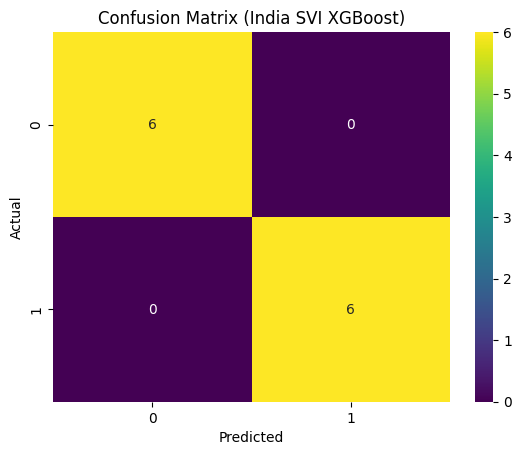

In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

# Load and prepare India data
india_df = pd.read_excel("IndiaMetroStatus.xlsx")
india_df.columns = india_df.columns.str.strip().str.upper()
india_df = india_df.rename(columns={'NAME': 'Region', 'TAR_POP': 'Population'})
india_df[['RURAL', 'URBAN', 'COVERAGE']] = india_df[['RURAL', 'URBAN', 'COVERAGE']].fillna(0)

# Feature engineering
india_df['Rural_Urban_Ratio'] = india_df['RURAL'] / india_df['URBAN'].replace(0, 1)
india_df['Rural_Pct'] = india_df['RURAL'] / india_df['Population'].replace(0, 1)
india_df['Urban_Pct'] = india_df['URBAN'] / india_df['Population'].replace(0, 1)

# Pseudo-labeling via US model
mapped_df = india_df[['Population', 'COVERAGE']].copy()
mapped_df['Administered_Dose1_Recip'] = mapped_df['Population']
mapped_df['Series_Complete_Yes'] = mapped_df['Population'] * (mapped_df['COVERAGE'] / 100)
mapped_df['Vaccination_Coverage'] = mapped_df['Series_Complete_Yes'] / mapped_df['Administered_Dose1_Recip'].replace(0, 1)

X_transfer = mapped_df[['Administered_Dose1_Recip', 'Series_Complete_Yes', 'Vaccination_Coverage']]
X_transfer_scaled = scaler.transform(X_transfer)
pseudo_labels = model.predict(X_transfer_scaled)

india_df['Pseudo_SVI_Rank'] = pseudo_labels
india_df['Pseudo_SVI_CTGY'] = india_df['Pseudo_SVI_Rank'].map({3: 'A', 2: 'B', 1: 'C', 0: 'D'})

# Filter classes with at least 2 instances
X = india_df[['Population', 'Rural_Urban_Ratio', 'COVERAGE', 'Rural_Pct', 'Urban_Pct']]
y = india_df['Pseudo_SVI_Rank']
valid_classes = y.value_counts()[y.value_counts() >= 2].index
mask = y.isin(valid_classes)
X = X[mask]
y = y[mask]

# Balance the dataset using SMOTE
sm = SMOTE(random_state=42)
X_bal, y_bal = sm.fit_resample(X, y)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_bal, y_bal, test_size=0.25, random_state=42, stratify=y_bal)

# XGBoost model
india_model = XGBClassifier(n_estimators=300, max_depth=4, learning_rate=0.05, objective='multi:softmax',
                            num_class=4, eval_metric='mlogloss', random_state=42, use_label_encoder=False)
india_model.fit(X_train, y_train)

# Evaluation
y_pred = india_model.predict(X_test)
print("Classification Report (India XGBoost Transfer Learning Model):\n")
print(classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='viridis')
plt.title("Confusion Matrix (India SVI XGBoost)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Prediction function
def predict_svi_india_rural_urban(input_dict):
    input_dict = input_dict.copy()
    pop = input_dict.get('Population', 0) or 1
    rural = input_dict.get('RURAL', 0)
    urban = input_dict.get('URBAN', 0)
    coverage = input_dict.get('COVERAGE', 0)

    input_dict['Rural_Urban_Ratio'] = rural / urban if urban != 0 else 0
    input_dict['Rural_Pct'] = rural / pop
    input_dict['Urban_Pct'] = urban / pop

    vector = [input_dict.get(col, 0) for col in ['Population', 'Rural_Urban_Ratio', 'COVERAGE', 'Rural_Pct', 'Urban_Pct']]
    prediction = india_model.predict([vector])[0]
    return {3: 'A', 2: 'B', 1: 'C', 0: 'D'}.get(prediction, 'Unknown')

In [32]:
predict_svi_india_rural_urban({
    'Population': 20000000,
    'RURAL': 1000000,
    'URBAN': 19000000,
    'COVERAGE': 92.5
})
# Expected: Likely category 'D' or 'C' (less vulnerable)

'D'

In [33]:
predict_svi_india_rural_urban({
    'Population': 1200000,
    'RURAL': 1000000,
    'URBAN': 200000,
    'COVERAGE': 47.3
})
# Expected: Likely category 'A' or 'B' (more vulnerable)

'C'

In [34]:
predict_svi_india_rural_urban({
    'Population': 5000000,
    'RURAL': 2500000,
    'URBAN': 2500000,
    'COVERAGE': 68.1
})
# Expected: Likely category 'B' or 'C'

'C'

In [35]:
predict_svi_india_rural_urban({
    'Population': 3000000,
    'RURAL': 0,
    'URBAN': 3000000,
    'COVERAGE': 35.0
})
# Expected: Likely category 'B' or even 'A' depending on how strongly the model weights coverage

'C'

## **Stacked Ensemble Model**



Class Distribution in Pseudo_SVI_Rank:
Pseudo_SVI_Rank
3    10
2     8
1     8
0     8
Name: count, dtype: int64
Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:18:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Fitting 3 folds for each of 729 candidates, totalling 2187 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [15:20:16] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "scale_pos_weight", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and 


Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.50      0.50      0.50         2
           2       0.17      0.50      0.25         2
           3       0.00      0.00      0.00         3

    accuracy                           0.33         9
   macro avg       0.42      0.38      0.35         9
weighted avg       0.37      0.33      0.31         9


F1 Score (Macro Average):
0.35416666666666663


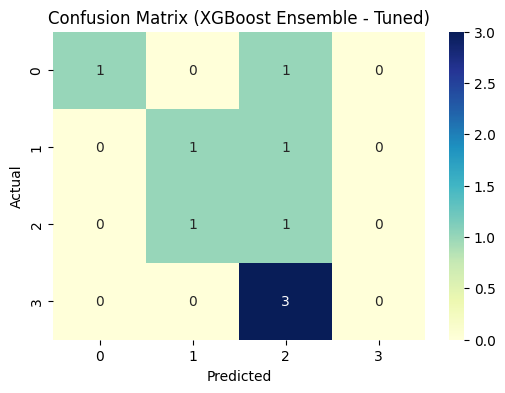

Predicted SVI Category: C


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [50]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, f1_score
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

# Load datasets
df_metro = pd.read_excel("IndiaMetroStatus.xlsx")
df_caste = pd.read_csv("india_caste_data.csv")

# Standardize column names
df_metro.columns = df_metro.columns.str.strip()
df_caste.columns = df_caste.columns.str.strip()

# Merge on standardized name
df = pd.merge(df_metro, df_caste, left_on="NAME", right_on="Name", how="inner")

# Handle missing values
for col in ['P_SC', 'P_ST', 'P_OC', 'RURAL', 'URBAN', 'COVERAGE']:
    df[col] = df[col].fillna(0)
df['TAR_POP'] = df['TAR_POP'].replace(0, 1)  # Prevent division by zero

# Feature Engineering
df['SC_pct'] = df['P_SC'] / df['TAR_POP']
df['ST_pct'] = df['P_ST'] / df['TAR_POP']
df['OC_pct'] = df['P_OC'] / df['TAR_POP']
df['Rural_Urban_Ratio'] = df['RURAL'] / df['URBAN'].replace(0, 1)
df['Rural_Pct'] = df['RURAL'] / df['TAR_POP']
df['Urban_Pct'] = df['URBAN'] / df['TAR_POP']

# Pseudo labels (if not present, create a synthetic one for demo)
if 'Pseudo_SVI_Rank' not in df.columns:
    df['Pseudo_SVI_Rank'] = pd.qcut(df['COVERAGE'], 4, labels=[3, 2, 1, 0])  # A-D

# Check class distribution
print("Class Distribution in Pseudo_SVI_Rank:")
print(df['Pseudo_SVI_Rank'].value_counts())

# Train caste model
features_caste = ['TAR_POP', 'SC_pct', 'ST_pct', 'OC_pct']
X_caste = df[features_caste]
y = df['Pseudo_SVI_Rank']

scaler_caste = StandardScaler()
X_caste_scaled = scaler_caste.fit_transform(X_caste)

X_train_caste, X_test_caste, y_train, y_test = train_test_split(X_caste_scaled, y, stratify=y, test_size=0.25, random_state=42)

# XGBoost with early stopping and hyperparameter tuning
param_grid = {
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [5, 10, 15],
    'n_estimators': [100, 200, 500],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'min_child_weight': [1, 3, 5]
}

# Setup XGBoost with early stopping
model_caste = xgb.XGBClassifier(
    use_label_encoder=False,
    scale_pos_weight=10,
    random_state=42,
)

# Use GridSearchCV to tune the model
grid_search = GridSearchCV(model_caste, param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
grid_search.fit(X_train_caste, y_train)

# Get best model from grid search
best_model_caste = grid_search.best_estimator_

# Train rural/urban model
features_ru = ['TAR_POP', 'Rural_Urban_Ratio', 'Rural_Pct', 'Urban_Pct', 'COVERAGE']
X_ru = df[features_ru]

scaler_ru = StandardScaler()
X_ru_scaled = scaler_ru.fit_transform(X_ru)

X_train_ru, X_test_ru, _, _ = train_test_split(X_ru_scaled, y, stratify=y, test_size=0.25, random_state=42)

# Setup and tune XGBoost model for rural/urban data
model_ru = xgb.XGBClassifier(
    use_label_encoder=False,
    scale_pos_weight=10,
    random_state=42,
)

grid_search_ru = GridSearchCV(model_ru, param_grid, cv=3, verbose=1, n_jobs=-1, scoring='accuracy')
grid_search_ru.fit(X_train_ru, y_train)

# Get best model for rural/urban model
best_model_ru = grid_search_ru.best_estimator_

# Ensemble model
y_pred_caste = best_model_caste.predict(X_test_caste)
y_pred_ru = best_model_ru.predict(X_test_ru)

# Simple majority vote (this can be adjusted to more advanced ensemble techniques)
y_pred = np.round((y_pred_caste + y_pred_ru) / 2)

# Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# F1 Score for better evaluation of class imbalance
print("\nF1 Score (Macro Average):")
print(f1_score(y_test, y_pred, average='macro'))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='YlGnBu')
plt.title("Confusion Matrix (XGBoost Ensemble - Tuned)")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Prediction function
def predict_svi(input_dict):
    pop = input_dict.get('TAR_POP', 0) or 1
    rural = input_dict.get('RURAL', 0)
    urban = input_dict.get('URBAN', 0)
    coverage = input_dict.get('COVERAGE', 0)
    sc = input_dict.get('P_SC', 0)
    st = input_dict.get('P_ST', 0)
    oc = input_dict.get('P_OC', 0)

    sc_pct = sc / pop
    st_pct = st / pop
    oc_pct = oc / pop
    rur_pct = rural / pop
    urb_pct = urban / pop
    rur_urb_ratio = rural / urban if urban else 0

    x_caste = scaler_caste.transform([[pop, sc_pct, st_pct, oc_pct]])
    x_ru = scaler_ru.transform([[pop, rur_urb_ratio, rur_pct, urb_pct, coverage]])

    pred_caste = best_model_caste.predict(x_caste)[0]
    pred_ru = best_model_ru.predict(x_ru)[0]

    # Simple majority voting
    final_pred = round((pred_caste + pred_ru) / 2)
    return {3: 'A', 2: 'B', 1: 'C', 0: 'D'}[final_pred]

# Example
example_input = {
    'TAR_POP': 1000000,
    'RURAL': 600000,
    'URBAN': 400000,
    'COVERAGE': 65,
    'P_SC': 200000,
    'P_ST': 150000,
    'P_OC': 300000
}
print(f"Predicted SVI Category: {predict_svi(example_input)}")